In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math

In [2]:
def image_projection(w, h, nx, ny, f, coord_universe, T0C, Display = False):
    
    '''
    w: width of retina in m
    h: height of retina in m
    nx: horizontal pixels number
    ny: vertical pixels number
    f: focal length in m
    coord_universe: list -> Coordinate of the object / point in the universe frame
    TOC: Sympy Matrix -> Position of camera relative to the universe
    
    '''
    
    [xp, yp, zp] = coord_universe 
    
    # Size of te individual pixel
    Dw = symbols('dw')
    Dh = symbols('dh')

    # Principal point (centre of the renita)
    U0 = symbols('u0')
    V0 = symbols('v0')

    # Focal length in m
    F = symbols('f')

    # Coordinate of the object / point in the universe frame
    Xp = symbols('x_p')
    Yp = symbols('y_p')
    Zp = symbols('z_p')
    
    # Coordinate of the object homogeneous form
    P0 = Matrix([Xp, Yp, Zp, 1])

    # Camera parameters
    CM = Matrix([[F/Dw, 0, U0, 0],
                 [0, F/Dh, V0, 0],
                 [0, 0, 1, 0]])

    RES = CM * T0C**-1 * P0
    
    # Retina coordinate homogeneous form
    homo_retina = RES.subs({U0: nx/2, V0: ny/2, 
                    F: f, 
                    Dw: w/nx, Dh: h/ny, 
                    Xp: xp, Yp: yp, Zp: zp})
    
    # Retina coordinate
    retina = Matrix([round(homo_retina[0]/homo_retina[-1], 1), 
                     round(homo_retina[1]/homo_retina[-1], 1)])
    
    if Display:
        print('Camera parameters matrix')
        display(CM.subs({F: f, Dw: w/nx, Dh: h/ny, U0: nx/2, V0: ny/2}))
        
        print('Position of camera to the universe')
        display(T0C)
        
        print('Position of the object in the universe')
        display(P0.subs({Xp: xp, Yp: yp, Zp: zp}))
        
        print('Retina coordinates homogeneous')
        display(homo_retina)
        
        print('Retina coordinates')
        display(retina)
        
    # Retina coordinate
    u, v = int(retina[0]), int(retina[1])
    return [u, v]

## Qn 1

In [3]:
# Q(a, b)

# Corrected
L1 = symbols('L1')
L2 = symbols('L2')
L3 = symbols('L3')
L4 = symbols('L4')
d1 = symbols('d1')
theta1 = symbols('\\theta_1')
theta2 = symbols('\\theta_2')

DH1 = [0, 0, L1 + L2, theta1]
T01 = Tlink(DH1)
symprint('T', 0, 1)
matprint(T01)

DH2 = [0, -pi/2, L3 + d1, 0]
T12 = Tlink(DH2)
symprint('T',1, 2)
matprint(T12)

DH3 = [0, 0, 0, theta2]
T23 = Tlink(DH3)
symprint('T',2, 3)
matprint(T23)

DHE = [0, 0, L4, 0]
T3E = Tlink(DHE)
symprint('T',3, 'E')
matprint(T3E)

T0E = simplify(T01 * T12 * T23 * T3E)
symprint('T',0, 'E')
matprint(T0E)


T0E.subs({L1: 1, L2: 1, L3: 2, L4:0.5})

^0T_1

Matrix([
[cos(\theta_1), -sin(\theta_1), 0,       0],
[sin(\theta_1),  cos(\theta_1), 0,       0],
[            0,              0, 1, L1 + L2],
[            0,              0, 0,       1]])

^1T_2

Matrix([
[1,  0, 0,       0],
[0,  0, 1, L3 + d1],
[0, -1, 0,       0],
[0,  0, 0,       1]])

^2T_3

Matrix([
[cos(\theta_2), -sin(\theta_2), 0, 0],
[sin(\theta_2),  cos(\theta_2), 0, 0],
[            0,              0, 1, 0],
[            0,              0, 0, 1]])

^3T_E

Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, 1, L4],
[0, 0, 0,  1]])

^0T_E

Matrix([
[cos(\theta_1)*cos(\theta_2), -sin(\theta_2)*cos(\theta_1), -sin(\theta_1), (-L3 - L4 - d1)*sin(\theta_1)],
[sin(\theta_1)*cos(\theta_2), -sin(\theta_1)*sin(\theta_2),  cos(\theta_1),  (L3 + L4 + d1)*cos(\theta_1)],
[             -sin(\theta_2),               -cos(\theta_2),              0,                       L1 + L2],
[                          0,                            0,              0,                             1]])

Matrix([
[cos(\theta_1)*cos(\theta_2), -sin(\theta_2)*cos(\theta_1), -sin(\theta_1), (-d1 - 2.5)*sin(\theta_1)],
[sin(\theta_1)*cos(\theta_2), -sin(\theta_1)*sin(\theta_2),  cos(\theta_1),  (d1 + 2.5)*cos(\theta_1)],
[             -sin(\theta_2),               -cos(\theta_2),              0,                         2],
[                          0,                            0,              0,                         1]])

In [4]:
# Q(c)

T0E.subs({L1: 1, L2: 1, L3: 2, L4:0.5, theta2: 0})

Matrix([
[cos(\theta_1),  0, -sin(\theta_1), (-d1 - 2.5)*sin(\theta_1)],
[sin(\theta_1),  0,  cos(\theta_1),  (d1 + 2.5)*cos(\theta_1)],
[            0, -1,              0,                         2],
[            0,  0,              0,                         1]])

In [5]:
# Q(d)

theta1 = np.arctan2(0, 1)
theta1

0.0

In [6]:
# Q(e)

t = symbols('t')
theta1 = Function(r"\theta_1")(t)
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1, t, t)

t = symbols('t')
theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)

t = symbols('t')
d1 = Function(r"d_1")(t)
d1_dot = diff(d1, t)
d1_ddot = diff(d1, t, t)


alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({theta1: symbols(r"\theta_1"),
              theta1_dot: symbols(r"\dot{\theta_1}"),
              theta1_ddot: symbols(r"\ddot{\theta_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}"),
              d1: symbols(r"\d_1"),
              d1_dot: symbols(r"\dot{d_1}"),
              d1_ddot: symbols(r"\ddot{d_1}")
             })


omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])

T01 = T01.subs({L1: 1, L2: 1, L3: 2, L4: 0.5, theta2: 0})
T12 = T12.subs({L1: 1, L2: 1, L3: 2, L4: 0.5, theta2: 0})
T23 = T23.subs({L1: 1, L2: 1, L3: 2, L4: 0.5, theta2: 0})
T3E = T3E.subs({L1: 1, L2: 1, L3: 2, L4: 0.5, theta2: 0})

omega_11, v_11 = revolute_joint(frame = 1, 
                                theta_dot = theta1_dot, 
                                transform_low_high = T01, 
                                omega = omega, v = v, 
                                alias = alias)

omega_22, v_22 = prismatic_joint(frame = 2, 
                                d_dot = d1_dot, 
                                transform_low_high = T12, 
                                omega = omega_11, v = v_11, 
                                alias = alias)

omega_33, v_33 = revolute_joint(frame = 3, 
                                theta_dot = theta2_dot, 
                                transform_low_high = T23, 
                                omega = omega_22, v = v_22, 
                                alias = alias)

omega_ee, v_ee = revolute_joint(frame = 'e', 
                                theta_dot = '', 
                                transform_low_high = T3E, 
                                omega = omega_33, v = v_33, 
                                alias = alias)

Jee, J0 = Jacobian(parameters = [theta1_dot, d1_dot], 
                   v_ee = v_ee, 
                   omega_ee = omega_ee, 
                   transform_low_high = T0E,
                   alias = alias)

^1\Omega_1

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^1V_1

Matrix([
[0],
[0],
[0]])

^2\Omega_2

Matrix([
[              0],
[-\dot{\theta_1}],
[              0]])

^2V_2

Matrix([
[-\dot{\theta_1}*(d1 + 2)],
[                       0],
[               \dot{d_1}]])

^3\Omega_3

Matrix([
[-\dot{\theta_1}*sin(\theta_2)],
[-\dot{\theta_1}*cos(\theta_2)],
[               \dot{\theta_2}]])

^3V_3

Matrix([
[-\dot{\theta_1}*(d1 + 2)*cos(\theta_2)],
[ \dot{\theta_1}*(d1 + 2)*sin(\theta_2)],
[                             \dot{d_1}]])

^e\Omega_e

Matrix([
[-\dot{\theta_1}*sin(\theta_2)],
[-\dot{\theta_1}*cos(\theta_2)],
[               \dot{\theta_2}]])

^eV_e

Matrix([
[\dot{\theta_1}*(-d1 - 2.5)*cos(\theta_2)],
[ \dot{\theta_1}*(d1 + 2.5)*sin(\theta_2)],
[                               \dot{d_1}]])

^eJ_e

Matrix([
[(-d1 - 2.5)*cos(\theta_2), 0],
[ (d1 + 2.5)*sin(\theta_2), 0],
[                        0, 1],
[           -sin(\theta_2), 0],
[           -cos(\theta_2), 0],
[                        0, 0]])

^0J_

Matrix([
[(-d1 - 2.5)*cos(\theta_1), -sin(\theta_1)],
[(-d1 - 2.5)*sin(\theta_1),  cos(\theta_1)],
[                        0,              0],
[                        0,              0],
[                        0,              0],
[                        1,              0]])

## Qn 3

In [7]:
# Given info

nx = 800
ny = 600
f = 1.8
T0C = Matrix([[0, -1, 0, 2],
              [1, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

xp, yp, zp = 2, 4, 20 # Coordinate in the universe

# Retina size
W = symbols('W')
H = symbols('H') 

Dw = W/nx 
Dh = H/ny

# Principal point (centre of the renita)
U0 = symbols('u0')
V0 = symbols('v0')

# Focal length in m
F = symbols('f')

# Coordinate of the object / point in the universe frame
Xp = symbols('x_p')
Yp = symbols('y_p')
Zp = symbols('z_p')

# Coordinate of the object homogeneous form
P0 = Matrix([Xp, Yp, Zp, 1])

# Camera parameters
CM = Matrix([[F/Dw, 0, U0, 0],
             [0, F/Dh, V0, 0],
             [0, 0, 1, 0]])

RES = CM * T0C**-1 * P0

# Retina coordinate homogeneous form
homo_retina = RES.subs({U0: nx/2, V0: ny/2, 
                F: f,
                Xp: xp, Yp: yp, Zp: zp})

# Retina coordinate
retina = Matrix([homo_retina[0]/homo_retina[-1], 
                 homo_retina[1]/homo_retina[-1]])

retina

Matrix([
[400.0 + 216.0/W],
[          300.0]])

## Q4

Displacement equations for theta_1


-0.72*t**3 + 5.4*t**2 + 30


Velocity equations for theta_1


-2.16*t**2 + 10.8*t


Acceleration equations for theta_1


10.8 - 4.32*t

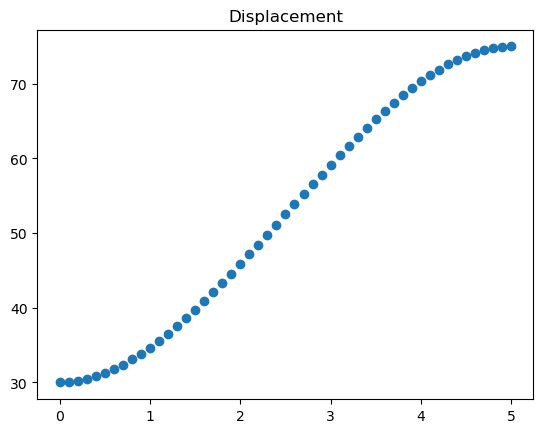

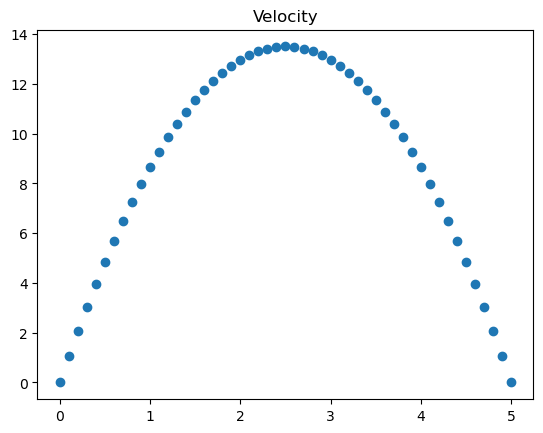

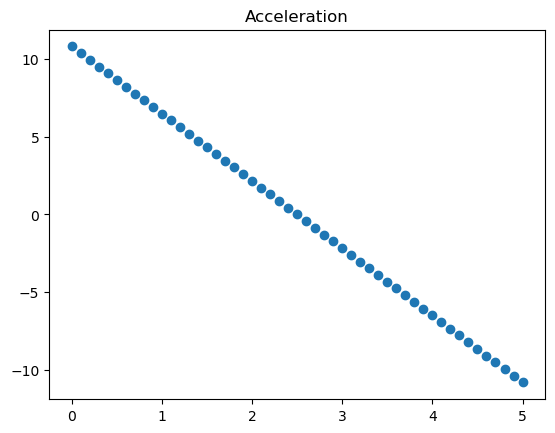

In [8]:
# Part 1
t1 = [30, 75]

angle_lst = [t1]

tf = 5
t_lst = np.arange(0, tf + 0.1, 0.1)

for i in range(len(angle_lst)):
    
    a0 = angle_lst[i][0]
    a1 = 0
    a2 = 3/tf**2 * (angle_lst[i][-1] - angle_lst[i][0])
    a3 = -2/tf**3 * (angle_lst[i][-1] - angle_lst[i][0])
    
    t = symbols('t')
    print(f'Displacement equations for theta_{i+1}')
    eqn_disp = a0 + a1 * t + a2 * t**2 + a3 * t**3
    
    display(eqn_disp)
    
    disp = [eqn_disp.subs(t, i) for i in t_lst]
    
    disp_deg_1 = [float(i) for i in disp]
    
    print('')
    
    print(f'Velocity equations for theta_{i+1}')
    eqn_vel = a1 + 2 * a2 * t + 3 * a3 * t**2
    
    vel = [eqn_vel.subs(t, i) for i in t_lst]
    display(eqn_vel)
    
    vel_list_1 = [float(i) for i in vel]
    
    print('')
    
    print(f'Acceleration equations for theta_{i+1}')
    eqn_acc = 2 * a2 + 6 * a3 * t
    
    acc = [eqn_acc.subs(t, i) for i in t_lst]
    display(eqn_acc)
    
    acc_list_1 = [float(i) for i in acc]
    
    plt.scatter(t_lst, disp_deg_1, label = f'theta_{i+1}')
    plt.title('Displacement')
    plt.show()
    
    plt.scatter(t_lst, vel_list_1, label = f'theta_{i+1}')
    plt.title('Velocity')
    plt.show()
    
    plt.scatter(t_lst, acc_list_1, label = f'theta_{i+1}')
    plt.title('Acceleration')
    plt.show()
    
    
    

Displacement equations for theta_1


-2.22222222222222*t**3 + 10.0*t**2 + 75


Velocity equations for theta_1


-6.66666666666667*t**2 + 20.0*t


Acceleration equations for theta_1


20.0 - 13.3333333333333*t

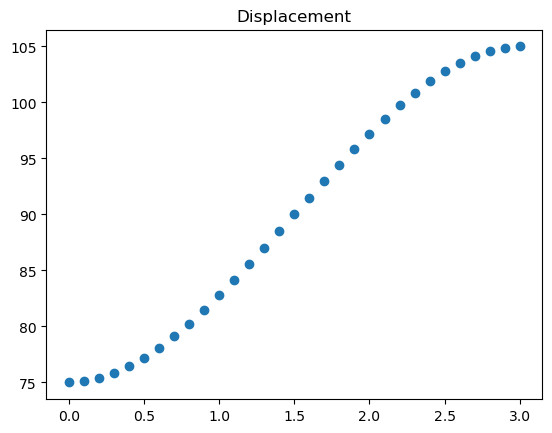

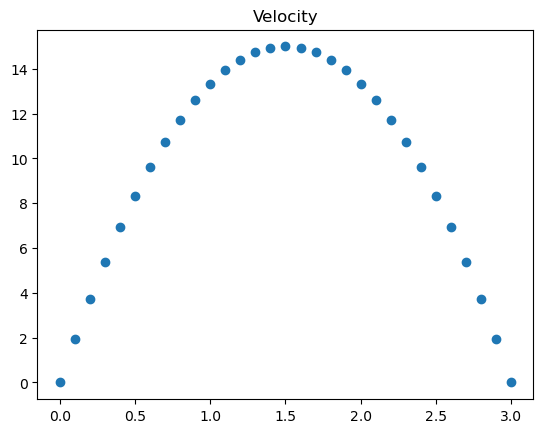

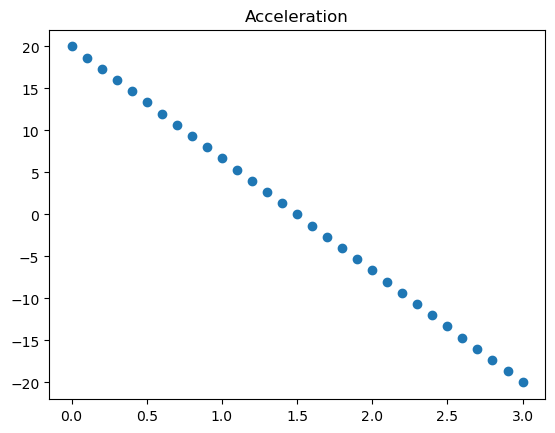

In [9]:
# Part 1
t1 = [75, 105]

angle_lst = [t1]

tf = 3
t_lst = np.arange(0, tf + 0.1, 0.1)

for i in range(len(angle_lst)):
    
    a0 = angle_lst[i][0]
    a1 = 0
    a2 = 3/tf**2 * (angle_lst[i][-1] - angle_lst[i][0])
    a3 = -2/tf**3 * (angle_lst[i][-1] - angle_lst[i][0])
    
    t = symbols('t')
    print(f'Displacement equations for theta_{i+1}')
    eqn_disp = a0 + a1 * t + a2 * t**2 + a3 * t**3
    
    display(eqn_disp)
    
    disp = [eqn_disp.subs(t, i) for i in t_lst]
    
    disp_deg_2 = [float(i) for i in disp]
    
    print('')
    
    print(f'Velocity equations for theta_{i+1}')
    eqn_vel = a1 + 2 * a2 * t + 3 * a3 * t**2
    
    vel = [eqn_vel.subs(t, i) for i in t_lst]
    display(eqn_vel)
    
    vel_list_2 = [float(i) for i in vel]
    
    print('')
    
    print(f'Acceleration equations for theta_{i+1}')
    eqn_acc = 2 * a2 + 6 * a3 * t
    
    acc = [eqn_acc.subs(t, i) for i in t_lst]
    display(eqn_acc)
    
    acc_list_2 = [float(i) for i in acc]
    
    plt.scatter(t_lst, disp_deg_2, label = f'theta_{i+1}')
    plt.title('Displacement')
    plt.show()
    
    plt.scatter(t_lst, vel_list_2, label = f'theta_{i+1}')
    plt.title('Velocity')
    plt.show()
    
    plt.scatter(t_lst, acc_list_2, label = f'theta_{i+1}')
    plt.title('Acceleration')
    plt.show()
    

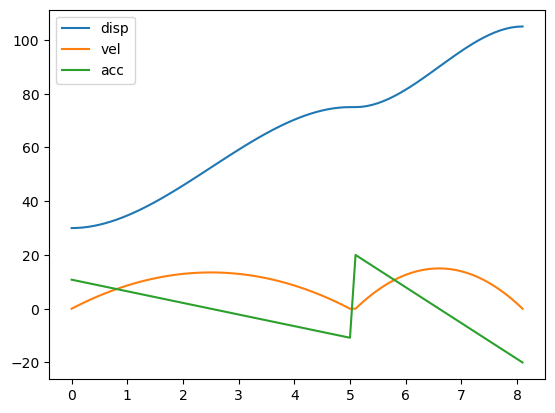

In [10]:
# Join both graph together

time = np.arange(0, 8+0.2, 0.1)
disp_deg = np.concatenate([disp_deg_1, disp_deg_2])
vel_list = np.concatenate([vel_list_1, vel_list_2])
acc_list = np.concatenate([acc_list_1, acc_list_2])
plt.plot(time, disp_deg, label = 'disp')
plt.plot(time, vel_list, label = 'vel')
plt.plot(time, acc_list, label = 'acc')
plt.legend()